In [ ]:

!pip install tensorflow
!pip install opencv-python
!pip install numpy
!pip install matplotlib
import tensorflow as tf
from tensorflow.keras import layers, models
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 85.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 126.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 113.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 131.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.0 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
def preprocess_image(image_path):
    # Load image using OpenCV
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image not found at path: {image_path}")
    # Resize the image to 224x224
    img = cv2.resize(img, (224, 224))
    # Normalize the image
    img = img.astype("float32") / 255.0
    return img
def load_and_preprocess_dataset(dataset_folder):
    image_data = []
    labels = []

    # Walk through the dataset folder and process each image
    for label in ['real', 'fake']:
        folder_path = os.path.join(dataset_folder, label)
        for image_file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_file)
            try:
                # Preprocess the image
                processed_image = preprocess_image(image_path)
                # Append to data and label lists
                image_data.append(processed_image)
                # Assign label: 1 for ‘fake’, 0 for ‘real’
                labels.append(1 if label == 'fake' else 0)
            except Exception as e:
                print(f"Error processing image {image_file}: {e}")

    # Convert lists to numpy arrays
    image_data = np.array(image_data)
    labels = np.array(labels)
    return image_data, labels

# Example usage
dataset_folder = '/content/drive/MyDrive/data'
x, y = load_and_preprocess_dataset(dataset_folder)
print(f"Total images processed: {len(x)}")


Total images processed: 7104


In [ ]:


model = models.Sequential()

# First Conv layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Second Conv layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third Conv layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification (Real/Fake)

model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,396,609 (169.36 MB)

 Trainable params: 44,396,609 (169.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), batch_size=32)

Epoch 1/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 643s 4s/step - accuracy: 0.8712 - loss: 0.3353 - val_accuracy: 0.9669 - val_loss: 0.1006
Epoch 2/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 638s 4s/step - accuracy: 0.9760 - loss: 0.0699 - val_accuracy: 0.9606 - val_loss: 0.1150
Epoch 3/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 638s 4s/step - accuracy: 0.9781 - loss: 0.0513 - val_accuracy: 0.9683 - val_loss: 0.0853
Epoch 4/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 639s 4s/step - accuracy: 0.9888 - loss: 0.0326 - val_accuracy: 0.9761 - val_loss: 0.0653
Epoch 5/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 636s 4s/step - accuracy: 0.9891 - loss: 0.0337 - val_accuracy: 0.9817 - val_loss: 0.0552
Epoch 6/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 637s 4s/step - accuracy: 0.9954 - loss: 0.0138 - val_accuracy: 0.9824 - val_loss: 0.0678
Epoch 7/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 636s 4s/step - accuracy: 0.9977 - loss: 0.0072 - val_accuracy: 0.9817 - val_loss: 0.0740
Epoch 8/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 635s 4s/step - accuracy: 0.9956 - loss: 0.0107 - val_accu

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score
import seaborn as sns


In [ ]:
# Get predictions for validation set
y_pred_probs = model.predict(x_val)
y_pred = (y_pred_probs > 0.5).astype("int32")  # Convert probabilities to 0 or 1


45/45 ━━━━━━━━━━━━━━━━━━━━ 28s 612ms/step


In [ ]:
test_loss, test_acc = model.evaluate(x_val, y_val)
print(f"Test accuracy: {test_acc}")


45/45 ━━━━━━━━━━━━━━━━━━━━ 27s 596ms/step - accuracy: 0.9804 - loss: 0.0551
Test accuracy: 0.9774806499481201


In [ ]:
# Classification report
print("Classification Report:")
print(classification_report(y_val, y_pred))

# Individual metrics
acc = np.mean(y_pred.flatten() == y_val.flatten())
prec = precision_score(y_val, y_pred)
rec = recall_score(y_val, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       896
           1       0.97      0.97      0.97       525

    accuracy                           0.98      1421
   macro avg       0.98      0.98      0.98      1421
weighted avg       0.98      0.98      0.98      1421

Accuracy: 0.9775
Precision: 0.9713
Recall: 0.9676


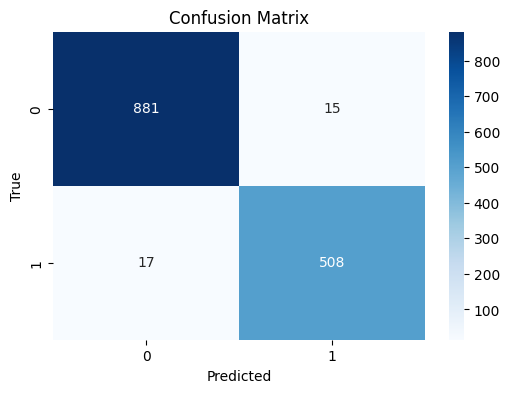

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


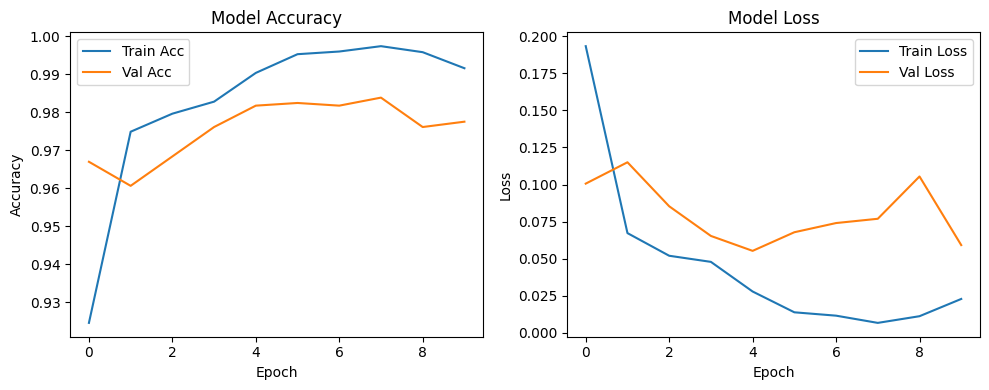

In [ ]:
# Plot accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_val, y_pred)
print(f"F1-Score: {f1:.4f}")


F1-Score: 0.9695


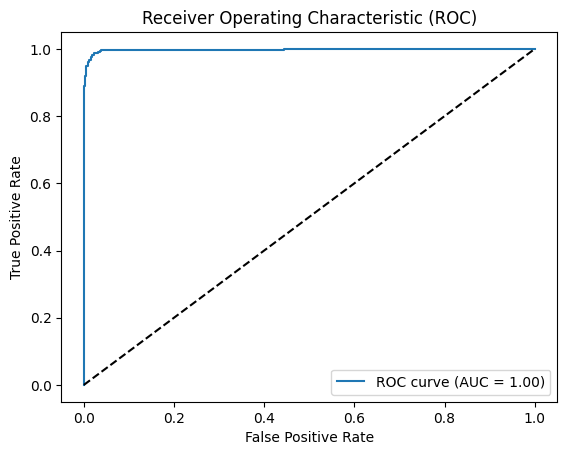

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_val, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
